<center>
    <h1> ILI286 - Computación Científica II </h1>
    <h2> Tarea 2 - Pauta </h2>
    <h2> [S]cientific [C]omputing [T]eam </h2>
    <h3> _19 de Marzo 2017_ </h3>
</center>

# Tabla de Contenidos
* [1.- Objetivos](#obj)
* [2.- Introducción](#intro)
* [3.- Desarrollo](#desarrollo)
    * [3.1- Analisis de los métodos](#analisis)
    * [3.2- Aplicando lo aprendido](#aplicacion)
* [4.- Instrucciones](#instr)
* [5.- Referencias](#ref)

<div id='obj' />
# 1. _Objetivos_

Para la presente tarea se tiene por objetivos:

* Conocer y programar los métodos vistos en clases para calcular los valores propios de una matriz. 
* Analizar como se comportan estos algoritmos según distintas variables.
* Aplicar uno de estos algoritmos a un problema real.

<div id='intro' />
# 2. _Introducción_ 


Existen muchos problemas de la informática donde los _valores y vectores propios_ juegan un papel importante al momento de obtener información valiosa. Uno de los elementos de mayor relevancia es el **valor propio dominante** de una matriz, y en este laboratorio mediante un análisis de tiempo y precisión veremos distintas técnicas para poder obtenerlo de forma rápida y concisa. 

<div id='desarrollo' />
# 3. _Desarrollo_ 

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import norm, solve, linalg
import scipy
import scipy.linalg
import time

<div id='analisis' />
## 3.1 _Análisis de los métodos_

1.- Deberá implementar los 4 métodos vistos en clases (_Power Iteration_, _Rayleigh Quotient Iteration_ y _Unshifted QR Algorithm_).Puede usar los notebooks vistos en clases, y es libre de realizar las modificaciones que estime pertinente. Para probarlos, necesitará de una función que le retorne una matriz simétrica definida positiva (y por lo tanto _invertible_), y conocer sus valores propios. Esto lo puede lograr realizando lo siguiente:

 * Creamos una matriz cuadrada _A_ de números aleatorios entre 0 y 1, con el tamaño que deseé para la matriz final.
 * Descomponemos la matriz _A_ mediante _QR_ (_A_ = QR ). 
 * Luego, construiremos una matriz diagonal _D_ con los valores propios que usaremos mas adelante. Puede usar la siguiente fórmula para los valores de la diagonal:
   * $\large \lambda_n = \frac{1}{2n + 2}$, $\mbox{ } n = 0,1,2,\ldots$
 * Finalmente crearemos la matriz _B_ = _QDQ*_, la cual sera una matriz simétrica definida positiva y con valores propios conocidos.
 
   Nota: Use la misma semilla para crear las matrices aleatorias y realizar la tarea (para esto puede usar la función de numpy _numpy.random.seed_ ).
   
2.- A continuación, se le pide estimar el tiempo que demora cada algoritmo en una iteración. Para esto, cree matrices $A_{nxn}$ para
_n_ = 10, 100, 500 y 1000, luego guarde el tiempo que demora cada algoritmo en ejecutar una iteración. Se recomienda que repita varias veces el experimento por cada método y calcule el promedio de los tiempos guardados. Muestre los resultados obtenidos en un único gráfico. Para la medición de tiempos puede usar la función _timeit_ $^{1}$ o _time.time()_ $^{2}$.

Para apreciar de mejor forma los resultados, se debe hacer uso de función _semilogy_ para gráficar. A continuación se presenta un pequeño ejemplo de como usar esta función:

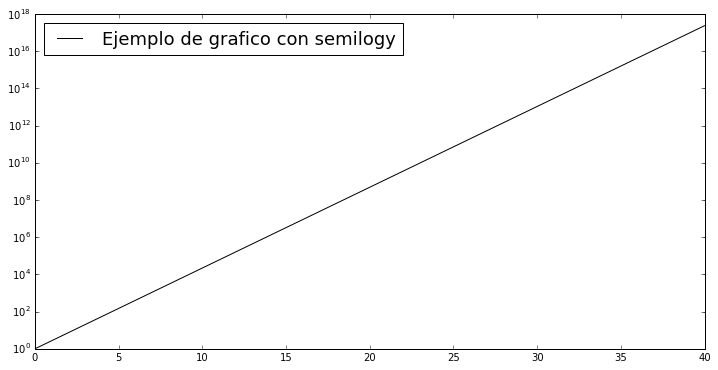

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Sets de datos
x = np.arange(0, 50, 10)
y = np.exp(x)

plt.figure(figsize=(12,6))
plt.semilogy(x, y, 'k-',label = 'Ejemplo de grafico con semilogy')
#Si se quiere colocar una etiqueta, puede usar la funcion legend
plt.legend(loc = 2,prop={'size':18})
plt.show()

3.- Analice que tan rápido convergen sus métodos para _i_ iteraciones. Para esto, calcule el tiempo que demoran los algoritmos en llegar a un error de $10^{-10}$. Para calcular el error, puede usar la expresión $error = |\lambda_{real} - \lambda_{método}^{(i)}|$, donde $\lambda_{real}$ es el valor propio dominante e _i_ es el número de iteración. Se recomienda que repita varias veces el experimento por cada método y calcule el promedio de los tiempos guardados. Posteriormente, deberá realizar un único gráfico tiempo vs tamaño de la matriz (n = 10,100,500,1000) donde el eje _x_ es la dimensión, y el eje _y_ será el tiempo que demora su algoritmo llegar al error propuesto. 

4.- Finalmente, compare los 2 resultados de tiempo y explique las diferencias que encuentre. Además, mencione las ventajas y desventajas que presenta cada método según su análisis. ¿Cuál algoritmo es mejor? ¿Bajo que argumentos?

## Pregunta 1

In [3]:
def crear_matriz(n):
#Seteamos la semilla en 0 para obtener siempre la misma matriz aleatoria de nxn
    np.random.seed(0)
    #Creamos una matriz y la llenamos con valores aleatorios
    B = []
    for i in range(n):
        tmp = []
        for j in range(n):
            tmp.append(np.random.rand())
        B.append(tmp)
    #Hacemos la decomposicion QR = B
    Q, R = linalg.qr(B)
    #Creamos una matriz diagonal con n valores propios
    lam = []
    for i in range(n):
        lam.append(1.0 / (1.0 + (1+i)))
    Lambda = np.diag(lam)
    A = np.dot(Q,np.dot(Lambda,Q.transpose()))
    return A

#Algoritmo Power Iteration
def power_iteration(A, x, k):
    for j in range(k):
        u = x/norm(x)
        x = np.dot(A, u)
    lam = np.dot(u, x)
    u = x/norm(x)
    return (lam, u) 

#Algoritmo Raylight power iteration
def rqi(A, x, k):
    for j in range(k):
        u = x/norm(x)
        lam = np.dot(u.T, np.dot(A, u))
        try:
            x = solve(A -lam*np.eye(*A.shape), u)
        except numpy.linalg.linalg.LinAlgError:
            break
    u = x/norm(x)
    lam = float(np.dot(u.T, np.dot(A, u)))
    return (lam, u)

#Algoritmo Unshifted QR
def unshiftedqr(A,k):
    Q_0 = np.eye(A.shape[0])
    Qbarra = Q_0.copy()
    R_0 = A.copy()
    for i in range(k):
        Q_0,R_0 = np.linalg.qr( np.dot(R_0,Q_0) )
        Qbarra = np.dot(Qbarra,Q_0)
    lam = np.diag( np.dot(R_0,Q_0) )
    return lam,Qbarra,lam[0]

## Pregunta 2

In [4]:
#En esta celda se inicializan los vectores inciales para cada algoritmo y las respectivas matrices.
y1 = np.ones(10) 
M1 = crear_matriz(10)
y2 = np.ones(100)
M2 = crear_matriz(100)
y3 = np.ones(500)
M3 = crear_matriz(500)
y4 = np.ones(1000)
M4 = crear_matriz(1000)

In [5]:
#Funcion para calcular el tiempo promedio de cada metodo
def tiempo_promedio(metodo):
    resultado = [0,0,0,0]
    for i in range(4):
        if(metodo == 1):
            a = %timeit -n 1 -r 1 -o -q  power_iteration(M1,y1,500)
            b = %timeit -n 1 -r 1 -o -q  power_iteration(M2,y2,500)
            c = %timeit -n 1 -r 1 -o -q  power_iteration(M3,y3,500)
            d = %timeit -n 1 -r 1 -o -q  power_iteration(M4,y4,500)
            resultado[0] = a.best + resultado[0] 
            resultado[1] = b.best + resultado[1]  
            resultado[2] = c.best + resultado[2]  
            resultado[3] = d.best + resultado[3]          
        if(metodo == 2):
            a = %timeit -n 1 -r 1 -o -q  rqi(M1,y1,500)
            b = %timeit -n 1 -r 1 -o -q  rqi(M2,y2,500)
            c = %timeit -n 1 -r 1 -o -q  rqi(M3,y3,500)
            d = %timeit -n 1 -r 1 -o -q  rqi(M4,y4,500)
            resultado[0] = a.best + resultado[0] 
            resultado[1] = b.best + resultado[1]  
            resultado[2] = c.best + resultado[2]  
            resultado[3] = d.best + resultado[3]         
        if(metodo == 3):
            a = %timeit -n 1 -r 1 -o -q  unshiftedqr(M1,500)
            b = %timeit -n 1 -r 1 -o -q  unshiftedqr(M2,500)
            c = %timeit -n 1 -r 1 -o -q  unshiftedqr(M3,500)
            d = %timeit -n 1 -r 1 -o -q  unshiftedqr(M4,500)
            resultado[0] = a.best + resultado[0] 
            resultado[1] = b.best + resultado[1]  
            resultado[2] = c.best + resultado[2]  
            resultado[3] = d.best + resultado[3]  
    return(np.dot(resultado,0.0004))

Posteriormente, obtenemos los tiempos de los 4 algoritmos, utilizando 500 iteraciones y repitiendo el experimento 5 veces, guardando los resultados en arreglos que seran usados posteriormente:

In [6]:
PI = tiempo_promedio(1)
print(PI)

[  8.85269148e-06   1.80331631e-05   5.99505949e-05   7.93784822e-04]


In [7]:
RQI = tiempo_promedio(2)
print(RQI)

[  3.59641823e-05   1.88139072e-04   7.79747916e-03   4.49080812e-02]


In [8]:
UQR = tiempo_promedio(3)
print(UQR)

[  9.92382314e-05   1.27358205e-03   7.89046023e-02   5.33163416e-01]


Finalmente procedemos a graficar los resultados:

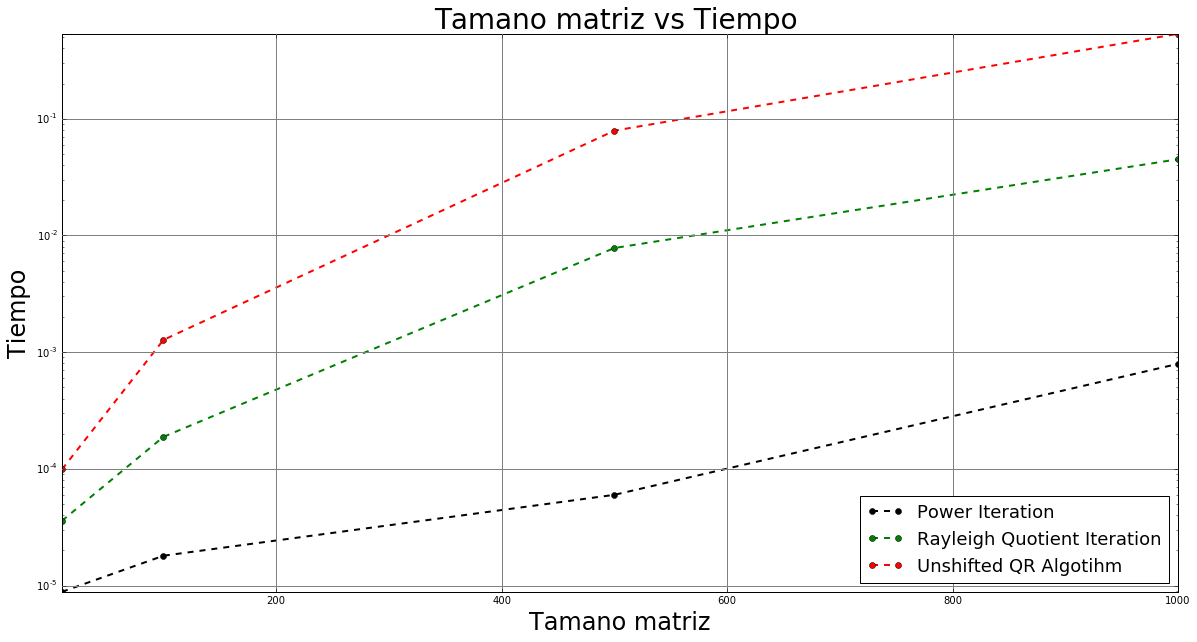

In [9]:
#Se analizan los ordenes de magnitud para que sea mas corto el calculo
size = [10,100,500,1000]
plt.figure(figsize=(20,10))
plt.semilogy(size, PI, '--ko', linewidth = 2, label = 'Power Iteration')
plt.hold(True)
plt.semilogy(size, RQI,'--go', linewidth = 2, label = 'Rayleigh Quotient Iteration')
plt.hold(True)
plt.semilogy(size, UQR,'--ro', linewidth = 2, label = 'Unshifted QR Algotihm')
plt.legend(loc = 4,prop={'size':18})
plt.xlabel("Tamano matriz", fontsize = 24)
plt.ylabel("Tiempo", fontsize = 24)
plt.grid(True)
plt.grid(color = '0.5', linestyle = '-', linewidth = 1)
plt.axis('tight')
plt.title("Tamano matriz vs Tiempo ",fontsize = 28, verticalalignment = 'baseline', horizontalalignment = 'center')
plt.show()

## Pregunta 3

Para el cálculo del error, primero se inicializan las variables fijas, las cuales seran la tolerancia de error, la cual es $1e-10$ y el valor propio dominante teórico, el cual sabemos cual es ($\frac{1}{2}$, el valor mas grande). La función recibe el método a usar (1=Power Iteration, 2=Inverse Power Iteration,3=Rayleigh Quotient Iteration y 4=Unshifted QR Algorithm), además del tamaño de la matriz, la cual sera usada para crear la matriz y el vector inicial. Posteriormente se crean 2 arreglos donde se almacenará la iteración y el error correspondiente a esa iteración. Luego, se calcula la primera iteración en el método correspondiente. Si casualmente se encuentra el valor propio dominante, no es necesario hacer un ciclo $while$, en caso contrario de procede a hacer iteraciones hasta que la diferencia entre el valor propio dominante y experimental sea menor que la tolerancia, agregando la iteración y error correspondientes a sus arreglos. Finalmente, se grafican los arreglos correspondientes para las matrices n=10,100,500,1000.

In [44]:
def calculo_error(metodo):    
    tol = 1e-10
    vp_teorico = 0.5
    iteracion = 1
    vp_experimental = 0
    resultado = [0,0,0,0]
    
    
    if(metodo == 1):
        for i in range(4):
            while(abs(vp_teorico - vp_experimental) >= tol):
                tiempo_inicial = time.time()
                vp_experimental, u = power_iteration(M1, y1, iteracion)
                resultado[0] = time.time() - tiempo_inicial + resultado[0]
                iteracion = iteracion+1
            vp_experimental = 0
            iteracion = 1

            while(abs(vp_teorico - vp_experimental) >= tol):
                tiempo_inicial = time.time()
                vp_experimental, u = power_iteration(M2, y2, iteracion)
                resultado[1] = time.time() - tiempo_inicial + resultado[1]
                iteracion = iteracion+1
            vp_experimental = 0
            iteracion = 1

            while(abs(vp_teorico - vp_experimental) >= tol):
                tiempo_inicial = time.time()
                vp_experimental, u = power_iteration(M3, y3, iteracion)
                resultado[2] = time.time() - tiempo_inicial + resultado[2]
                iteracion = iteracion+1
            vp_experimental = 0
            iteracion = 1

            while(abs(vp_teorico - vp_experimental) >= tol):
                tiempo_inicial = time.time()
                vp_experimental, u = power_iteration(M4, y4, iteracion)
                resultado[3] = time.time() - tiempo_inicial + resultado[3]
                iteracion = iteracion+1
            vp_experimental = 0
            iteracion = 1
        
    elif(metodo == 2):
        for i in range(4):
            while(abs(vp_teorico - vp_experimental) >= tol):
                tiempo_inicial = time.time()
                vp_experimental, u = rqi(M1,y1,iteracion)
                resultado[0] = time.time() - tiempo_inicial + resultado[0]
                iteracion = iteracion+1
            iteracion = 1
            vp_experimental = 0

            while(abs(vp_teorico - vp_experimental) >= tol):
                tiempo_inicial = time.time()
                vp_experimental, u = rqi(M2,y2,iteracion)
                resultado[1] = time.time() - tiempo_inicial + resultado[1]
                iteracion = iteracion+1
            iteracion = 1
            vp_experimental = 0

            while(abs(vp_teorico - vp_experimental) >= tol):
                tiempo_inicial = time.time()
                vp_experimental, u = rqi(M3,y3,iteracion)
                resultado[2] = time.time() - tiempo_inicial + resultado[1]
                iteracion = iteracion+1
            iteracion = 1
            vp_experimental = 0

            while(abs(vp_teorico - vp_experimental) >= tol):
                tiempo_inicial = time.time()
                vp_experimental, u = rqi(M4,y4,iteracion)
                resultado[3] = time.time() - tiempo_inicial + resultado[2]
                iteracion = iteracion+1
            iteracion = 1
            vp_experimental = 0
        
    elif(metodo == 3):
        for i in range(4):
            while(abs(vp_teorico - vp_experimental) >= tol):
                tiempo_inicial = time.time()
                tiempo_inicial = time.time()
                vp, u, vp_experimental = unshiftedqr(M1,iteracion)
                iteracion = iteracion+1
                resultado[0] = time.time() - tiempo_inicial + resultado[0]
            iteracion = 1
            vp_experimental = 0

            while(abs(vp_teorico - vp_experimental) >= tol):
                tiempo_inicial = time.time()
                vp, u, vp_experimental = unshiftedqr(M2,iteracion)
                iteracion = iteracion+1
                resultado[1] = time.time() - tiempo_inicial + resultado[1]
            iteracion = 1
            vp_experimental = 0

            while(abs(vp_teorico - vp_experimental) >= tol):
                tiempo_inicial = time.time()
                vp, u, vp_experimental = unshiftedqr(M3,iteracion)
                iteracion = iteracion+1
                resultado[2] = time.time() - tiempo_inicial + resultado[2]
            iteracion = 1
            vp_experimental = 0

            while(abs(vp_teorico - vp_experimental) >= tol):
                tiempo_inicial = time.time()
                vp, u, vp_experimental = unshiftedqr(M4,iteracion)
                iteracion = iteracion+1
                resultado[3] = time.time() - tiempo_inicial + resultado[3]
            iteracion = 1
            vp_experimental = 0
        
    return(np.dot(resultado,0.0004))

In [52]:
PI_error = calculo_error(1)
print(PI_error)

[  5.19847870e-06   1.08078003e-05   3.76266479e-05   4.83946037e-04]


In [53]:
RQI_error = calculo_error(2)
print(RQI_error)

[  1.19819641e-06   2.79960632e-06   1.24060631e-05   6.96465492e-05]


In [47]:
UQR_error = calculo_error(3)
print(UQR_error)

[  6.38065338e-05   5.12410831e-04   2.45335061e-02   1.49731313e-01]


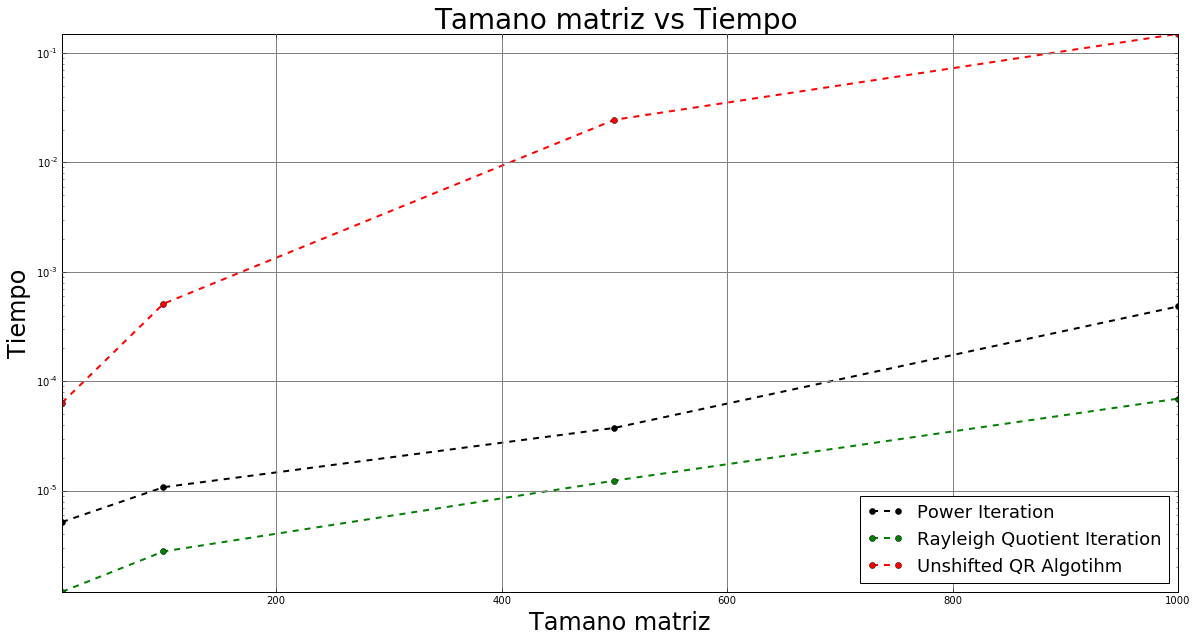

In [54]:
#Se analizan los ordenes de magnitud para que sea mas corto el calculo
size = [10,100,500,1000]
plt.figure(figsize=(20,10))
plt.semilogy(size, PI_error, '--ko', linewidth = 2, label = 'Power Iteration')
plt.hold(True)
plt.semilogy(size, RQI_error,'--go', linewidth = 2, label = 'Rayleigh Quotient Iteration')
plt.hold(True)
plt.semilogy(size, UQR_error,'--ro', linewidth = 2, label = 'Unshifted QR Algotihm')
plt.legend(loc = 4,prop={'size':18})
plt.xlabel("Tamano matriz", fontsize = 24)
plt.ylabel("Tiempo", fontsize = 24)
plt.grid(True)
plt.grid(color = '0.5', linestyle = '-', linewidth = 1)
plt.axis('tight')
plt.title("Tamano matriz vs Tiempo ",fontsize = 28, verticalalignment = 'baseline', horizontalalignment = 'center')
plt.show()

Podemos observar que el método mas eficiente y que demora menos tiempo es Rayleigh Quotient Iteration, puesto que se actualiza con el valor propio real (cabe destacar que dependiendo del vector inicial ingresado en el algoritmo, puede ser mas lento y con mas iteraciones). Luego, quien le sigue es Power Iteration, el cual se demora un poco mas de tiempo debido a la cantidad de iteraciones que debe realizar el algoritmo. Finalmente es Unshifted QR quien se demora la mayor cantidad de tiempo, debido a que este algoritmo encuentra todos los valores propios, siendo el primer valor de la diagonal el dominante, ademas de que la complejidad de Unshifted QR es superior a la de los demas algoritmos.

## Pregunta 4

Comparando los 2 gráficos, nos podemos dar cuenta que Power Iteration es el que menos se demora en cuanto a iteraciones, es decir, entre cada iteración se ejecuta más rápido que el resto de los algoritmos. Sin embargo, si se habla de el tiempo de muchas iteraciones para llegar a un resultado preciso, es Rayleigh Quotient Iteration quien demora menos, ya que con pocas iteraciones llega al resultado, mientras que power iteration necesita de mas iteraciones. Por otra parte, en los 2 analisis es Unshifted QR quien se demora mas en entregar resultados, puesto que nos entrega una mayor cantidad de información (todos los valores y vectores propios de la matriz). Depende del estudiante decidir con cual algoritmo se queda, y bajo que criterios.

<div id='aplicacion' />
## 3.2 _Aplicando lo aprendido_

* Una de las aplicaciones que se le pueden dar a los vectores y valores propios es el estudio y resolución de las **ecuaciones de diferencia**. Estas ecuaciones son similares a las _ecuaciones diferenciales_, pero usando sucesiones en vez de funciones (con un número finito de pasos). Un ejemplo de esto son los problemas de **crecimiento exponencial** (como el crecimiento de bacterias). La expresión general de la relación de recurrencia describe este modelo como:

    $$ P_{n+1} = KP_n $$

>Donde $P_0$ es la población inicial, y _K_ la constante de crecimiento. Su solución es:

$$ P_n = K^{n}P_0 , \mbox{ }n=1,2,3, \ldots$$

>Esto se logra ya que reemplazando en nuestra primera ecuación por la condición de población inicial, nos queda:

$$ P_1 = KP_0 $$

>Si seguimos avanzando, nos damos cuenta que $P_2 = KP_1$, y ya que conocemos $P_1$, esto nos queda que $P_2 = K^{2}P_0$, y haciendo esto _n_ veces llegamos a la solución propuesta anteriormente.

>En los problemas de crecimiento y reproducción de especies, un factor muy importante a analizar es la _edad_. Un modelo que nos ayuda a entender y resolver esta problemática es la **matriz de Leslie**. El problema en notación matricial tiene la siguiente estructura:

$$ x^{(n+1)} = Ax^{(n)}, \mbox{ } n \geq 0 $$

>Donde _A_ es la matriz de Leslie y _x_ un vector, con la siguiente forma:

$$ A = \begin{pmatrix} F_1 & F_2 & \cdots & F_{k-1} & F_k \\ P_0 & 0 & \cdots & 0 & 0 \\ 0 & P_1 & \cdots & 0 & 0 \\ \vdots & \vdots & \ddots & \vdots & \vdots \\ 0 & 0 & \cdots & P_{k-1} & 0 \end{pmatrix}, x^{(n)} = \begin{pmatrix} x_0^{(n)} \\ x_1^{(n)} \\ \vdots \\ x_k^{(n)} \end{pmatrix}$$

>Donde:
>* $x_{i}^{(n)}$ : hembras de edad _i_ vivas en el instante _n_.
>* $P_i$ : fracción de hembras de edad _i_ que seguiran vivas un año después.
>* $F_i$ : número medio de crías hembras nacidas de una hembra de edad _i_.

>Siendo asi, se propone el siguiente problema:

>_Supongamos que una población de animales hembras está dividida en dos clases de edad. En cada periodo el 8 % de la primera pasa a la segunda. El número medio de crías hembras de las hembras de la primera clase es de 1,5 y el de la segunda es de 2.
Además, inicialmente hay 100 hembras de cada clase de edad_. 

> La matriz _A_ entonces tiene la siguiente forma:
$$ A = \begin{pmatrix} 1.5 & 2 \\ 0.08 & 0  \end{pmatrix}$$


>* Encuentre una expresión explicita para el vector $x^{(n)}$, y grafique el vector para 10 instantes ($n=1,2,\ldots, 10$). Además, escoja uno de sus algoritmos para encontrar el **valor propio dominante** de la matriz de Leslie. ¿Cual es la relación que existe entre ambos métodos?

   >> _Hint_: _Fíjese como evoluciona el vector $x^{(n)}$ a traves de los instantes, ¿Aumenta o disminuye?_.

   >>_Hint2_: _Para una ecuación $u_n = A^n u_0$, si A es diagonalizable puede escribirse como $c_1 \lambda_1^n x_1 + c_2 \lambda_2^n x_2 + \ldots + c_k \lambda_k^n x_k $. Si $\lambda_1$ es el valor propio dominante, ¿Qué se puede deducir de la expresión $c_1 \lambda_1^{\large\textbf{n}} x_1$_ ?
   
>* Analice como se acerca el vector $x^{(n)}$ al _vector propio dominante_. Para esto, realice un gráfico de iteraciones vs distancia al vector dominante, donde esta distancia se obtiene con fórmula:$ \mbox{distancia} = | \hat{V}_{1} - \hat{x}^{k} | $, donde $\hat{V}_1$ es el vector propio dominante **normalizado**, y $\hat{x}^{(k)}$ es el vector $x$ en el instante _k_ **normalizado**.


* Proponga usted un problema donde son ocupados los vectores y valores propios, y proponga un algoritmo que lo resulva. Sea detallado tanto en su problema como en su algoritmo.

## Pregunta 1

La matriz A tiene la siguiente forma:

$$ A = \begin{pmatrix} F_1 & F_2 \\ P_0 & 0 \end{pmatrix} = \begin{pmatrix} 1,5 & 2 \\ 0.08 & 0 \end{pmatrix} $$

Además, replicando el caso ejemplo de la pregunta, se deduce que la expresión explícita para $x^{(n)}$ es:

$$ x^{(n)} = A^{n}x^{(0)}  , x^{(0)} = \begin{pmatrix} 100 \\ 100 \end{pmatrix} $$

Para el instante 1:

$$ x^{(1)} = Ax^{(0)} = \begin{pmatrix} 1,5 & 2 \\ 0.08 & 0 \end{pmatrix} \begin{pmatrix} 100 \\ 100 \end{pmatrix} = \begin{pmatrix} 350 \\ 8 \end{pmatrix} $$

Para el instante 2:

$$ x^{(2)} = Ax^{(1)} = \begin{pmatrix} 1,5 & 2 \\ 0.08 & 0 \end{pmatrix} \begin{pmatrix} 350 \\ 8 \end{pmatrix} = \begin{pmatrix} 541 \\ 28 \end{pmatrix} $$

Para el instante 3:

$$ x^{(3)} = Ax^{(2)} = \begin{pmatrix} 1,5 & 2 \\ 0.08 & 0 \end{pmatrix} \begin{pmatrix} 541 \\ 28 \end{pmatrix} = \begin{pmatrix} 867.5 \\  43.28 \end{pmatrix} $$

Nos damos cuenta de que el vector va aumentando a medida que avanzan los instantes. Por otro lado, calculamos el vector propio dominante:

In [40]:
Leslie = np.array([(1.5,2),(0.08,0)])
print(np.linalg.eig(Leslie))

(array([ 1.6, -0.1]), array([[ 0.99875234, -0.78086881],
       [ 0.04993762,  0.62469505]]))


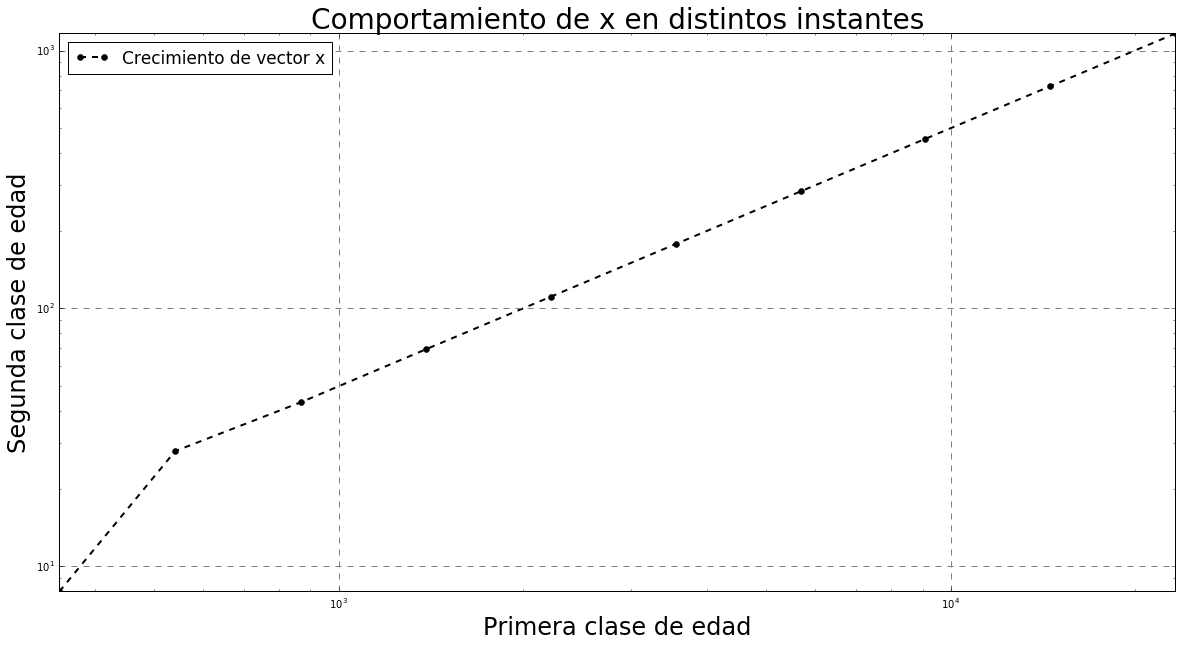

In [16]:
#graficando los valores se tiene:
initial_guest = np.array([100,100])
lista_valores_x = []
lista_valores_y = []

for i in range(10): 
    actual = np.dot(Leslie,initial_guest)
    lista_valores_x.append(actual[0])
    lista_valores_y.append(actual[1])
    initial_guest = actual

plt.figure(figsize=(20,10))
plt.loglog(lista_valores_x,lista_valores_y, '--ko', linewidth = 2, label = 'Crecimiento de vector x' )
plt.legend(loc = 2,prop={'size':17})
plt.xlabel("Primera clase de edad", fontsize = 24)
plt.ylabel("Segunda clase de edad", fontsize = 24)
plt.grid(True)
plt.xlim(0,6000)
plt.ylim(0,200)
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
plt.axis('tight')
plt.title("Comportamiento de x en distintos instantes",fontsize = 28, verticalalignment = 'baseline', horizontalalignment = 'center')
plt.show()    

Nos damos cuenta que el valor es positivo. Además, por el _hint_, si analizamos la expresión $c_1 \lambda_1^n x_1$, nos damos cuenta que si $n \ge 1$ la población tenderá a crecer, pero si $0 \le n \le 1$, la población probablemente va a decaer. En este caso, nos damos cuenta que $1.5999 \ldots \ge 1$, por lo que efectivamente podemos concluir que la problación crecerá.

Para observar el comportamiento del vector x a traves de los instantes,vemos como 

In [21]:
def comportamiento_vector_propio(initial_guest):
    tol = 1e-20

    v_propios = np.linalg.eig(Leslie)

    lista_vector_propio_dominante = []
    lista_vector_propio_dominante.append(v_propios[1][0][0])
    lista_vector_propio_dominante.append(v_propios[1][1][0])

    lista_vector_otro_propio = []
    lista_vector_otro_propio.append(v_propios[1][0][1])
    lista_vector_otro_propio.append(v_propios[1][1][1])

    lista_dominante = []

    contador = 1
    iteraciones = []

    actual = initial_guest
    while(np.linalg.norm(lista_vector_propio_dominante/np.linalg.norm(lista_vector_propio_dominante) - actual/np.linalg.norm(actual)) >= tol):
        actual = np.dot(Leslie,initial_guest)
        initial_guest = actual

        iteraciones.append(contador)
        lista_dominante.append(np.linalg.norm(lista_vector_propio_dominante/np.linalg.norm(lista_vector_propio_dominante) - actual/np.linalg.norm(actual)))
        contador = contador + 1

    plt.figure(figsize=(20,10))
    plt.semilogy(iteraciones,lista_dominante, '--ko', linewidth = 2, label = 'Distancia de 2 vectores' )
    plt.legend(loc = 1,prop={'size':17})
    plt.xlabel("iteraciones", fontsize = 24)
    plt.ylabel("Distancia a vector dominante", fontsize = 24)
    plt.grid(True)
    plt.xlim(0,6000)
    plt.ylim(0,200)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.axis('tight')
    plt.title("Distancia al vector dominante a traves de los instantes",fontsize = 28, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.show()    

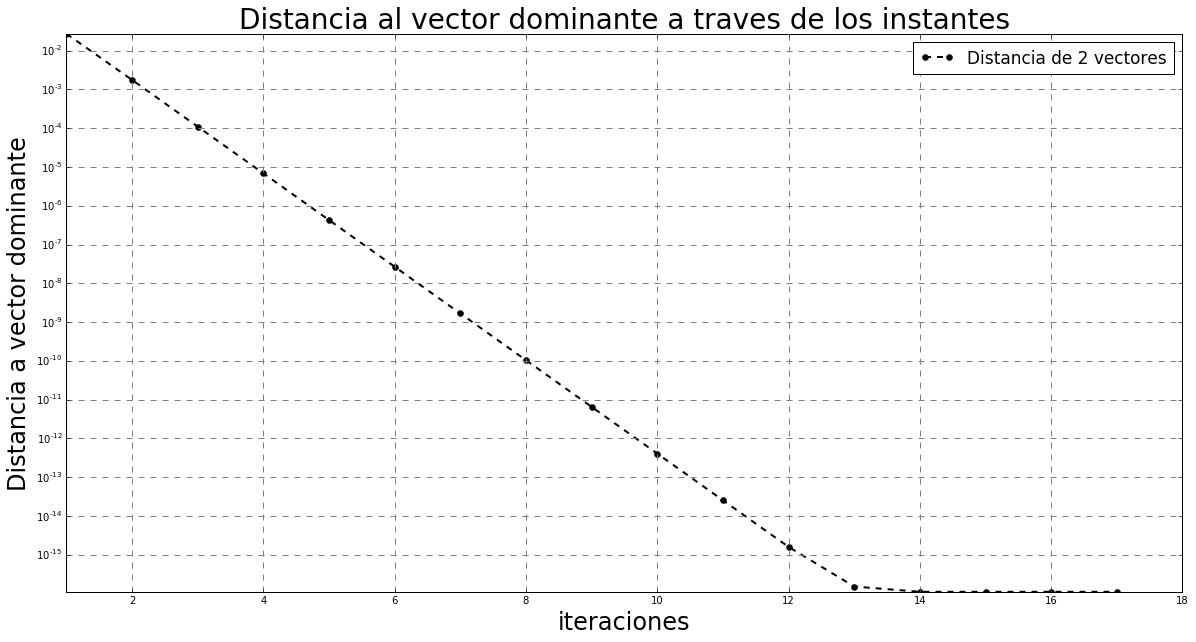

In [22]:
initial_guest = np.array([100,100])
comportamiento_vector_propio(initial_guest)

## Pregunta 2

En esta pregunta dependerá de el tiempo de busqueda de información y creatividad del estudiante para encontrar un problema donde se puedan aplicar valores y vectores propios, como la sucesión de Fibonacci, el _PageRank_ de google, etc. 

<div id='instr' />
# 4. _Instrucciones_:
 
 
* La estructura del laboratorio es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Introducción.
     3. Desarrollo y análisis de resultados.
     4. Conclusiones.
     5. Referencias.
* El laboratorio debe ser realizado en `Jupyter` notebook (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `SymPy`, `Matplotlib` y `ipywidgets`, así como la correcta implementación de algoritmos vectorizados cuando se indique.
* El archivo de entrega debe denominarse Tarea1-rol.tar.gz, y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las bibliotecas extras utilizadas.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* El trabajo es personal, no se permite compartir código, aunque sí se sugiere discutir aspectos generales con sus compañeros. En caso de sospecha de copia, se citará a los involucrados a defender sus conocimientos de manera presencial, evaluación cuya nota reemplazará la obtenida en la tarea.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.

<div id='ref' />
# 5. _Referencias_:

* 1.- Uso y ejemplos de _timeit_:
 - https://docs.python.org/2/library/timeit.html
* Magic _timeit_:
 - http://stackoverflow.com/questions/29280470/what-is-timeit-in-python
* 2.- Uso de libreria _time_:
 - https://docs.python.org/2/library/time.html